<a href="https://colab.research.google.com/github/bhardwajshivam/Autoencoders/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Performing PCA with a Linear Autoencoder

• If an autoencoder uses only linear activations and the cost function is the Mean Squared Error (MSE), then it can be shown that it ends up performing Principal Component Analysis (PCA).
• To demonstrate this capability, we create a cloud of 60 simulated random data points in 3-d. We could visualize such data.

In [ ]:
import numpy as np
np.random.seed(4)

In [ ]:
#m = no of points
#w1,w2 are weights, random angles generated between -0.5 to 3pi/2 -0.5
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
  angles = np.random.rand(m)*3*np.pi/2 -0.5
  data = np.empty((m, 3)) #to generate a 3d data
  data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise*np.random.randn(m)/2
  data[:, 1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
  data[:, 2] = data[:, 0]*w1 + data[:,1]*w2 + noise*np.random.randn(m)
  return data


X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0,keepdims=0)

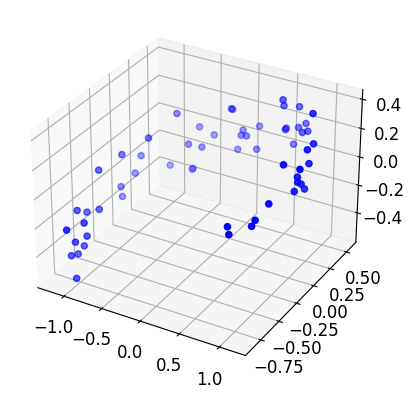

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train[:,0],X_train[:,1],X_train[:,2], c='b',marker='o')
plt.show()

# Autoencoders in keras

• Our encoder has 3 inputs (n_input = 3), and two dense layers./n
• “codings” are desired lower dimensional codes, representing inputs in a lower
dimensional (2-d) space

In [ ]:
import tensorflow as tf
from tensorflow import keras

np.random.seed(42)
tf.random.set_seed(42)

encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1.5))

history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 [==============================] - 4s 23ms/step - loss: 0.6595
Epoch 2/20
2/2 [==============================] - 0s 9ms/step - loss: 0.6380
Epoch 3/20
2/2 [==============================] - 0s 10ms/step - loss: 0.6176
Epoch 4/20
2/2 [==============================] - 0s 10ms/step - loss: 0.5990
Epoch 5/20
2/2 [==============================] - 0s 12ms/step - loss: 0.5813
Epoch 6/20
2/2 [==============================] - 0s 12ms/step - loss: 0.5647
Epoch 7/20
2/2 [==============================] - 0s 9ms/step - loss: 0.5492
Epoch 8/20
2/2 [==============================] - 0s 8ms/step - loss: 0.5347
Epoch 9/20
2/2 [==============================] - 0s 9ms/step - loss: 0.5209
Epoch 10/20
2/2 [==============================] - 0s 14ms/step - loss: 0.5079
Epoch 11/20
2/2 [==============================] - 0s 9ms/step - loss: 0.4955
Epoch 12/20
2/2 [==============================] - 0s 9ms/step - loss: 0.4841
Epoch 13/20
2/2 [==============================] - 0s 9ms/step - lo

In [ ]:
codings = encoder.predict(X_train)


2/2 [==============================] - 0s 9ms/step


In [ ]:
codings
#In our case, with 60 3-d vectors in X_train, codings is a (60,2) numpy array which we could present as a 2-dim plot.

array([[ 0.5529024 , -1.3141755 ],
       [-0.36404526,  0.3282032 ],
       [ 0.4805122 , -1.2002213 ],
       [-0.04070535, -0.5055837 ],
       [ 0.06382237, -0.42899528],
       [ 0.00164281,  0.73759395],
       [ 0.6769179 , -1.370879  ],
       [ 0.426583  , -0.11668505],
       [-0.12477536,  0.89345056],
       [-0.35669   ,  0.7388213 ],
       [ 0.09342363, -0.7592243 ],
       [-0.03782503,  0.6460366 ],
       [ 0.33168778, -1.0211623 ],
       [ 0.54707396, -1.2022938 ],
       [ 0.07090995,  0.53523165],
       [-0.23168169,  0.02571062],
       [ 0.4107054 , -0.12000002],
       [-0.3736033 ,  0.8361149 ],
       [ 0.33223826,  0.08244892],
       [ 0.4503358 , -1.3058367 ],
       [-0.2975783 ,  0.75280946],
       [ 0.5444496 , -1.3871704 ],
       [ 0.07422993, -0.767234  ],
       [ 0.3699691 , -1.1293387 ],
       [ 0.13815136,  0.60263675],
       [ 0.34081045,  0.11825011],
       [-0.31450564,  0.16834871],
       [ 0.06073098,  0.5914909 ],
       [-0.0129781 ,

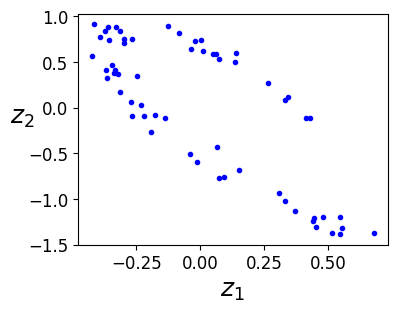

In [ ]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
#save_fig("linear_autoencoder_pca_plot")
plt.show()

# Deep Autoencoder for Mnist Images

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
#The pixel values of the images in both the training and test sets are normalized.
#The pixel values in the original dataset range from 0 to 255, and by dividing by 255,
#they are scaled to the range of 0 to 1, making it easier for the neural network to learn.
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:50000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:50000], y_train_full[-5000:]

11490434/11490434 [==============================] - 0s 0us/step


We will implement a stacked autoencoder using 4 dense layers. We will use so called He initialization, the SELU activation function, and L2 regularization.
• There are no labels (no 𝑦-s).
• The dimension of inputs, ninputs = 28 ∗ 28 = 784 (number of pixels in a MNIST image)

In [ ]:
n_inputs = 28 * 28
n_hidden1 = 100
n_hidden2 = 30 # codings (the dimension of the coding vector) n_hidden3 = n_hidden1
n_outputs = n_inputs

# Deep Autoencoder

'''

• The autoencoder has two submodels: the encoder and the decoder.

• The encoder takes 28 × 28–pixel grayscale images, flattens them so that each
image is represented as a vector of size 784, then processes these vectors through two layers of diminishing sizes (100 units then 30 units), both using the SELU activation function. For each input image, the encoder outputs a vector of size 30.

• The decoder takes codings of size 30 (output of the encoder) and processes them through two Dense layers of increasing sizes (100 units then 784 units), and reshapes the final vectors into 28 × 28 arrays so the decoder’s outputs have the same shape as the encoder’s inputs.

• When compiling the stacked autoencoder, we use the binary cross-entropy loss instead of the mean squared error. We are treating the reconstruction task as a multilabel binary classification problem: each pixel intensity represents the probability that the pixel should be black. Framing it this way (rather than as a regression problem) tends to make the model converge faster.

• Finally, we train the model using X_train as both the inputs and the targets (and similarly, we use X_valid as both the validation inputs and targets).
'''

In [ ]:
def rounded_accuracy(y_true, y_pred):
  return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
stacked_encoder = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]),
                                           keras.layers.Dense(100, activation="selu"),
                                            keras.layers.Dense(30, activation="selu"),])

stacked_decoder = keras.models.Sequential([keras.layers.Dense(100, activation="selu", input_shape=[30]),
                                           keras.layers.Dense(28 * 28, activation="sigmoid"),
                                           keras.layers.Reshape([28, 28])])

stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])
history = stacked_ae.fit(X_train, X_train, epochs=20, validation_data=[X_valid, X_valid])

Epoch 1/20
1563/1563 [==============================] - 11s 4ms/step - loss: 0.6222 - rounded_accuracy: 0.6526 - val_loss: 0.4616 - val_rounded_accuracy: 0.8297
Epoch 2/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3271 - rounded_accuracy: 0.8627 - val_loss: 0.2788 - val_rounded_accuracy: 0.8698
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2736 - rounded_accuracy: 0.8697 - val_loss: 0.2702 - val_rounded_accuracy: 0.8705
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2689 - rounded_accuracy: 0.8703 - val_loss: 0.2673 - val_rounded_accuracy: 0.8711
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2666 - rounded_accuracy: 0.8710 - val_loss: 0.2656 - val_rounded_accuracy: 0.8718
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2650 - rounded_accuracy: 0.8718 - val_loss: 0.2640 - val_rounded_accuracy: 0.8724
Epoch 7/20
1563/1563 [=================

1/1 [==============================] - 0s 63ms/step


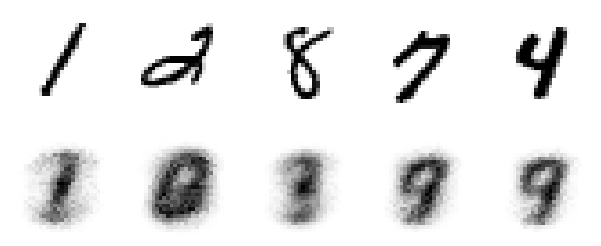

In [ ]:
#Visualizing the reconstructions

def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, n_images=5):
  reconstructions = model.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

# Tied Autoencoder

• When an autoencoder is neatly symmetrical, a common technique is to tie the weights of the decoder layers to the weights of the encoder layers.

• This almost halves the number of weights in the model, speeding up training and limiting the risk of overfitting.

• If the autoencoder has a total of N layers (not
counting the input layer), and WL represents the
connection weights of the Lth layer (e.g., layer 1 is
𝑁
and layer N is the output layer), then the decoder layer weights can be defined simply as:
the first hidden layer, layer Τ is the coding layer, 2
𝑇𝑁
𝑊 = 𝑊 , where 𝐿 = 1,2, . . , Τ . 𝑁−𝐿+1 𝐿 2
𝑇 stands for Transpose

• To understand why is the transpose needed, look at the size of inputs and outputs in the bottom layers and the top layers. Bottom layers have larger inputs and smaller outputs. Top layers the other way around, small inputs and large outputs.

• Implementing tied weights in TensorFlow using the Dense() layer is a bit cumbersome. It is easier to just define custom layer: DenseTranspose

In [ ]:
from tensorflow import keras
import tensorflow as tf
import numpy as np

# Define the DenseTranspose layer (assuming it is a custom layer)
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense_layer, activation, **kwargs):
        self.dense_layer = dense_layer
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)

    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias", initializer="zeros", shape=[self.dense_layer.input_shape[-1]])
        super().build(batch_input_shape)

    def call(self, inputs):
        z = tf.matmul(inputs, self.dense_layer.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

# Assuming the RoundedAccuracy function is defined
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([keras.layers.Flatten(input_shape=[28, 28]), dense_1, dense_2])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])  # Adjusted the Reshape layer
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])
tied_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(lr=1.5), metrics=[rounded_accuracy])

# Assuming X_train and X_valid are properly defined
history = tied_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))


Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.6498 - rounded_accuracy: 0.6233 - val_loss: 0.5651 - val_rounded_accuracy: 0.7440
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4528 - rounded_accuracy: 0.7984 - val_loss: 0.3802 - val_rounded_accuracy: 0.8154
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3457 - rounded_accuracy: 0.8240 - val_loss: 0.3176 - val_rounded_accuracy: 0.8338
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2917 - rounded_accuracy: 0.8476 - val_loss: 0.2709 - val_rounded_accuracy: 0.8600
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2619 - rounded_accuracy: 0.8665 - val_loss: 0.2564 - val_rounded_accuracy: 0.8705
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2541 - rounded_accuracy: 0.8710 - val_loss: 0.2511 - val_rounded_accuracy: 0.8734
Epoch 7/10
1563/1563 [==================

1/1 [==============================] - 0s 103ms/step


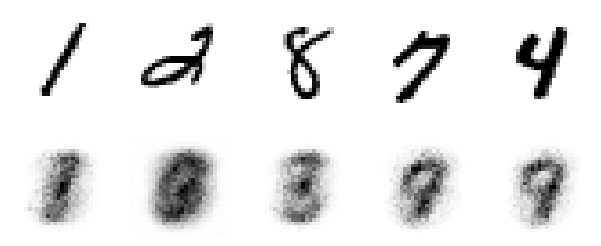

In [ ]:
def plot_image(image):
  plt.imshow(image, cmap="binary")
  plt.axis("off")

def show_reconstructions(model, n_images=5):
  reconstructions = tied_ae.predict(X_valid[:n_images])
  fig = plt.figure(figsize=(n_images * 1.5, 3))
  for image_index in range(n_images):
    plt.subplot(2, n_images, 1 + image_index)
    plot_image(X_valid[image_index])
    plt.subplot(2, n_images, 1 + n_images + image_index)
    plot_image(reconstructions[image_index])

show_reconstructions(stacked_ae)

# Training autoencoders in phases

In [ ]:
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer, n_epochs=10, output_activation=None, metrics=None):
  n_inputs = X_train.shape[-1]
  encoder = keras.models.Sequential([keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])])
  decoder = keras.models.Sequential([keras.layers.Dense(n_inputs, activation=output_activation), ])

  autoencoder = keras.models.Sequential([encoder, decoder])
  autoencoder.compile(optimizer, loss, metrics=metrics)
  autoencoder.fit(X_train, X_train, epochs=n_epochs,validation_data=[X_valid, X_valid])

  return encoder, decoder, encoder(X_train), encoder(X_valid)

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
K = keras.backend

X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(100, X_train_flat, X_valid_flat, "binary_crossentropy",
                                                           keras.optimizers.SGD(lr=1.5), output_activation="sigmoid",
                                                           metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(30, X_train_enc1, X_valid_enc1, "mse",
                                     keras.optimizers.SGD(lr=0.05), output_activation="selu")


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6624 - rounded_accuracy: 0.6124 - val_loss: 0.6082 - val_rounded_accuracy: 0.7332
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.5182 - rounded_accuracy: 0.8159 - val_loss: 0.4271 - val_rounded_accuracy: 0.8608
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3676 - rounded_accuracy: 0.8657 - val_loss: 0.3268 - val_rounded_accuracy: 0.8692
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3090 - rounded_accuracy: 0.8698 - val_loss: 0.2961 - val_rounded_accuracy: 0.8714
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2900 - rounded_accuracy: 0.8711 - val_loss: 0.2845 - val_rounded_accuracy: 0.8723
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2816 - rounded_accuracy: 0.8720 - val_loss: 0.2784 - val_rounded_accuracy: 0.8733
Epoch 7/10
1563/1563 [==================

Epoch 1/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1905 - val_loss: 0.1066
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.1002 - val_loss: 0.0941
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0896 - val_loss: 0.0852
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0815 - val_loss: 0.0779
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0751 - val_loss: 0.0724
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0702 - val_loss: 0.0680
Epoch 7/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0663 - val_loss: 0.0644
Epoch 8/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0630 - val_loss: 0.0613
Epoch 9/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0601 - val_loss: 0.0584
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 0.057

1/1 [==============================] - 0s 37ms/step


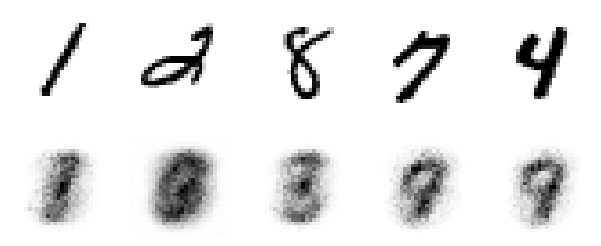

In [ ]:
#result of the first part of the training

stacked_ae_1_by_1 = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]),
                                             enc1, enc2, dec2, dec1,
                                              keras.layers.Reshape([28, 28])])

show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [ ]:
#second part of training

stacked_ae_1_by_1.compile(loss="binary_crossentropy",optimizer=keras.optimizers.SGD(lr=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10, validation_data=[X_valid, X_valid])


Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.2663 - rounded_accuracy: 0.8752 - val_loss: 0.2640 - val_rounded_accuracy: 0.8765
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2627 - rounded_accuracy: 0.8768 - val_loss: 0.2609 - val_rounded_accuracy: 0.8780
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2596 - rounded_accuracy: 0.8783 - val_loss: 0.2578 - val_rounded_accuracy: 0.8793
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2564 - rounded_accuracy: 0.8797 - val_loss: 0.2546 - val_rounded_accuracy: 0.8809
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2531 - rounded_accuracy: 0.8813 - val_loss: 0.2511 - val_rounded_accuracy: 0.8825
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2496 - rounded_accuracy: 0.8831 - val_loss: 0.2476 - val_rounded_accuracy: 0.8842
Epoch 7/10
1563/1563 [==================

1/1 [==============================] - 0s 19ms/step


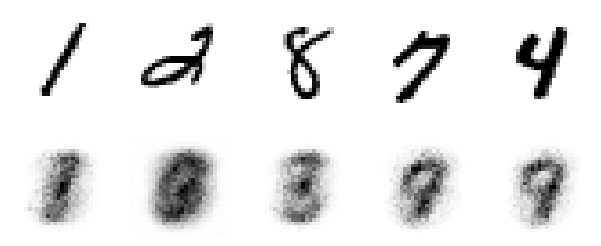

In [ ]:

stacked_ae_1_by_1 = keras.models.Sequential([ keras.layers.Flatten(input_shape=[28, 28]),
                                             enc1, enc2, dec2, dec1,
                                              keras.layers.Reshape([28, 28])])

show_reconstructions(stacked_ae_1_by_1)
plt.show()

#Unsupervised Training with stacked autoencoder



• If you are dealing with a complex supervised task but you do not have a lot of labeled training data, one solution is to find a neural network that performs a similar task, and then reuse its lower layers. This makes it possible to train a high- performance model using only little training data because your neural network won’t have to learn all the low-level features; it will just reuse the feature detectors learned by the existing net.

• Similarly, if you have a large dataset but most of it is unlabeled, you can first train a stacked auto-encoder using all the data, then reuse the lower layers to create a neural network for your actual task and train it using the labeled data.

• The stacked auto-encoder itself is typically trained one autoencoder at a time. When training the classifier, if you really don’t have much labeled training data, you may want to freeze the pre-trained layers (at least the lower ones).

#Pretraining using stacked autoencoders:
just train an autoencoder using all training data,then reuse its encoder layers to create a new neural netwrk

#Denoising Autoencoders

One important use case for autoencoders is removing noise from images and other data. One way to force an autoencoder to learn this useful mechanism is to add noise to autoencoder’s inputs, and train it to recover the original, noise-free inputs. This prevents the autoencoder from trivially copying its inputs to its outputs, so it ends up having to find patterns in the data.

The noise can be pure Gaussian noise added to the inputs, or it can be randomly switched off inputs, just like in the Dropout layer.

In [ ]:
#Denoising autoencoder with gaussian Noise

#for classification problem
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape = [30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=[X_valid, X_valid])



Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6077 - rounded_accuracy: 0.6664 - val_loss: 0.4149 - val_rounded_accuracy: 0.8500
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3101 - rounded_accuracy: 0.8655 - val_loss: 0.2755 - val_rounded_accuracy: 0.8692
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2726 - rounded_accuracy: 0.8685 - val_loss: 0.2690 - val_rounded_accuracy: 0.8699
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2685 - rounded_accuracy: 0.8693 - val_loss: 0.2664 - val_rounded_accuracy: 0.8706
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2663 - rounded_accuracy: 0.8701 - val_loss: 0.2646 - val_rounded_accuracy: 0.8714
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2645 - rounded_accuracy: 0.8709 - val_loss: 0.2630 - val_rounded_accuracy: 0.8723
Epoch 7/10
1563/1563 [==================

1/1 [==============================] - 0s 37ms/step


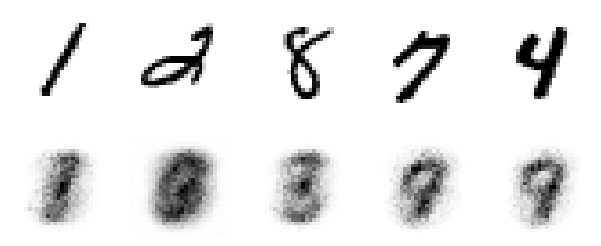

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, 5)
plt.show()

# Denoising autoencoder with dropout

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28,28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])

denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation='selu', input_shape = [30]),
    keras.layers.Dense(28*28, activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss='binary_crossentropy', optimizer=keras.optimizers.SGD(lr=1.0), metrics=[rounded_accuracy])

history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=[X_valid, X_valid])



Epoch 1/10
1563/1563 [==============================] - 8s 4ms/step - loss: 0.6322 - rounded_accuracy: 0.6406 - val_loss: 0.4855 - val_rounded_accuracy: 0.8160
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3498 - rounded_accuracy: 0.8568 - val_loss: 0.2822 - val_rounded_accuracy: 0.8701
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2760 - rounded_accuracy: 0.8693 - val_loss: 0.2699 - val_rounded_accuracy: 0.8708
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2696 - rounded_accuracy: 0.8701 - val_loss: 0.2668 - val_rounded_accuracy: 0.8717
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2672 - rounded_accuracy: 0.8710 - val_loss: 0.2651 - val_rounded_accuracy: 0.8726
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.2655 - rounded_accuracy: 0.8719 - val_loss: 0.2637 - val_rounded_accuracy: 0.8734
Epoch 7/10
1563/1563 [==================

1/1 [==============================] - 0s 41ms/step


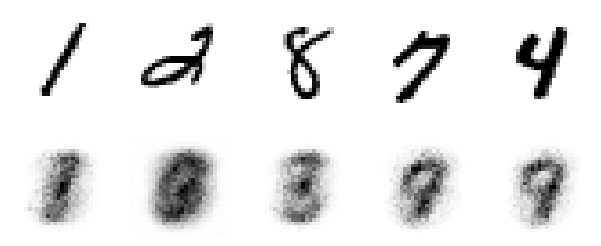

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)
dropout = keras.layers.Dropout(0.5)
show_reconstructions(denoising_ae, 5)

#Variational Autoencoders

• Standard autoencoders learn to generate compact representations and reconstruct their inputs well

• If we try to use autoencoders for generation, we have a serious problem. The latent space of codings (they convert their inputs to) may not be continuous, or allow easy interpolation.

• Naïve attempt to generate new instances similar to those present in the training set by making linear interpolation between codings produced by autoencoders does not produce satisfactory images.

• Variational autoencoders are introduced in 2014 by Diederik Kingma and Max Welling (https://arxiv.org/pdf/1312.6114.pdf) and they appear to have found one solution to the interpolation problem.

• By using VAEs we are capable to generate images that appear to reside on the same manifold as the training images.

• Variational autoencoders are probabilistic autoencoders, meaning that their outputs are partly determined by chance, even after training (as opposed to de-noising autoencoders, which use randomness only during training).

• Variational autoencoders are generative autoencoders, meaning that they can generate new instances that look like they were sampled from the training set.

(0.0, 1.0, 0.0, 0.95)

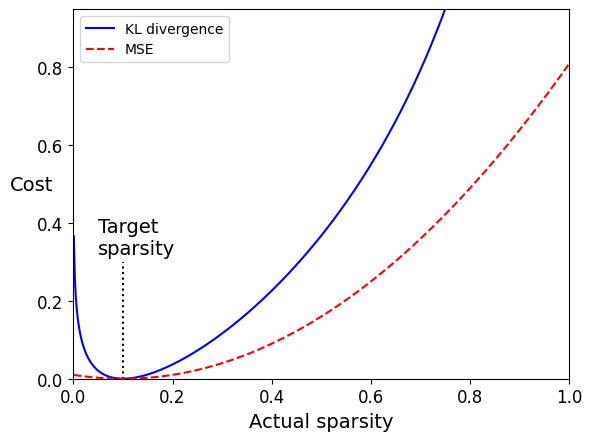

In [ ]:
p = 0.1
q = np.linspace(0.001, 0.999, 500)
kl_div = p * np.log(p / q) + (1 - p) * np.log((1 - p) / (1 - q))
mse = (p - q)**2
plt.plot([p, p], [0, 0.3], "k:")
plt.text(0.05, 0.32, "Target\nsparsity", fontsize=14)
plt.plot(q, kl_div, "b-", label="KL divergence")
plt.plot(q, mse, "r--", label="MSE")
plt.legend(loc="upper left")
plt.xlabel("Actual sparsity")
plt.ylabel("Cost", rotation=0)
plt.axis([0, 1, 0, 0.95])
